# CNN REGION EXTRACTION

In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, TimeDistributed, GlobalAveragePooling1D
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from glob import glob
from tensorflow.keras.optimizers import Adam
import pandas as pd

/Users/joshuabrauner/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
datasetFolder = "/Users/joshuabrauner/Desktop/LABELLED IMAGES"

In [3]:
def get_images_labels(images, label):
    arr = []
    labels = []
    for i in images:
        img = cv2.imread(i)
        if img is None:
            print(f"Error reading image: {i}")
            continue
        
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (120, 120))
        
        height, width = img.shape[:2]
        img1 = img[int(height * 0.25):int(height * 0.75), 0:int(width * 0.5)]
        img2 = img[int(height * 0.25):int(height * 0.75), int(width * 0.5):width]
        img3 = img[int(height * 0.75):height, 0:int(width * 0.5)]
        img4 = img[int(height * 0.75):height, int(width * 0.5):width]
        
        imgs = [
            cv2.resize(img1, (48, 48)),
            cv2.resize(img2, (48, 48)),
            cv2.resize(img3, (48, 48)),
            cv2.resize(img4, (48, 48))
        ]
        img = np.array(imgs)
        
        img_mean = np.mean(img)
        img = img - img_mean
        img = img / np.std(img)
        
        arr.append(img)
        labels.append(label)
        
    return arr, labels

In [4]:
# Define paths
advertisement_files = list(glob("/Users/joshuabrauner/Desktop/LABELLED IMAGES/advertisements/*.*"))
email_files = list(glob("/Users/joshuabrauner/Desktop/LABELLED IMAGES/email/*.*"))
handwritten_files = list(glob("/Users/joshuabrauner/Desktop/LABELLED IMAGES/handwritten/*.*"))
resume_files = list(glob("/Users/joshuabrauner/Desktop/LABELLED IMAGES/resume/*.*"))

print("Number of advertisement files:", len(advertisement_files))
print("Number of email files:", len(email_files))
print("Number of handwritten files:", len(handwritten_files))
print("Number of resume files:", len(resume_files))

Number of advertisement files: 378
Number of email files: 353
Number of handwritten files: 523
Number of resume files: 909


In [5]:
# Process the data if the lists are not empty
if advertisement_files:
    advertisements, Y_advertisement = get_images_labels(advertisement_files, 0)
else:
    advertisements, Y_advertisement = [], []

if email_files:
    email, Y_email = get_images_labels(email_files, 1)
else:
    email, Y_email = [], []

if handwritten_files:
    handwritten, Y_handwritten = get_images_labels(handwritten_files, 2)
else:
    handwritten, Y_handwritten = [], []

if resume_files:
    resume, Y_resume = get_images_labels(resume_files, 3)
else:
    resume, Y_resume = [], []

images = advertisements + email + handwritten + resume
labels = Y_advertisement + Y_email + Y_handwritten + Y_resume

print("Number of images loaded:", len(images))
print("Number of labels loaded:", len(labels))

images = np.asarray(images).astype('float32')
labels = np.asarray(labels).astype('float32')
labels = to_categorical(labels, num_classes=4)

Number of images loaded: 2163
Number of labels loaded: 2163


In [6]:
advertisements[0]
email[1]
handwritten[2]
resume[3]

array([[[ 0.4686075 ,  0.4686075 ,  0.4686075 , ...,  0.4686075 ,
          0.4686075 ,  0.4686075 ],
        [ 0.4686075 ,  0.4686075 ,  0.4686075 , ...,  0.4686075 ,
          0.4686075 ,  0.4686075 ],
        [ 0.4686075 , -0.66685979, -2.53407266, ...,  0.4686075 ,
          0.4686075 ,  0.4686075 ],
        ...,
        [ 0.4686075 ,  0.4686075 ,  0.4686075 , ...,  0.4686075 ,
          0.4686075 ,  0.4686075 ],
        [ 0.4686075 ,  0.4686075 ,  0.4686075 , ...,  0.4686075 ,
          0.4686075 ,  0.4686075 ],
        [ 0.4686075 ,  0.4686075 ,  0.4686075 , ...,  0.4686075 ,
          0.4686075 ,  0.4686075 ]],

       [[ 0.4686075 ,  0.4686075 ,  0.4686075 , ...,  0.4686075 ,
          0.4686075 ,  0.4686075 ],
        [ 0.4686075 ,  0.4686075 ,  0.4686075 , ...,  0.4686075 ,
          0.4686075 ,  0.4686075 ],
        [ 0.4686075 ,  0.4686075 ,  0.4686075 , ...,  0.4686075 ,
          0.4686075 ,  0.4686075 ],
        ...,
        [ 0.4686075 ,  0.4686075 ,  0.4686075 , ...,  

In [7]:
images.shape

(2163, 4, 48, 48)

In [8]:
labels.shape

(2163, 4)

In [9]:
for i in range(4):
    print(f"Shape of images[4][{i}]:", images[4][i].shape)
    if images[4][i].size < 100: 
        print(images[4][i])

Shape of images[4][0]: (48, 48)
Shape of images[4][1]: (48, 48)
Shape of images[4][2]: (48, 48)
Shape of images[4][3]: (48, 48)


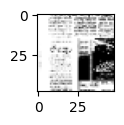

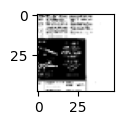

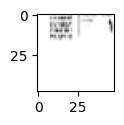

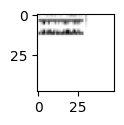

In [10]:
for i in range(4):
    img = images[4][i]
    if img.size == 48*48:
        img = img.reshape((48, 48))
    elif img.ndim == 1:
        continue 
    plt.figure(figsize=(1, 1))
    plt.imshow(img, cmap='gray')
    plt.grid(False)
    plt.show()

In [11]:
# Split the data into training and test sets
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Print the number of images in each set
print("Number of training images:", len(train_images))
print("Number of test images:", len(test_images))

Number of training images: 1730
Number of test images: 433


In [12]:
train_dir = "/Users/joshuabrauner/Desktop/Train"
test_dir = "/Users/joshuabrauner/Desktop/Test"

In [13]:
def save_images(images, labels, directory):
    if not os.path.exists(directory):
        os.makedirs(directory)
    for idx, img in enumerate(images):
        label = np.argmax(labels[idx]) 
        img_dir = os.path.join(directory, str(label))
        if not os.path.exists(img_dir):
            os.makedirs(img_dir)
        for j in range(4):
            img_path = os.path.join(img_dir, f"img_{idx}_part_{j}.png")
            cv2.imwrite(img_path, img[j] * 255)

save_images(train_images, train_labels, train_dir)


save_images(test_images, test_labels, test_dir)

print(f"Training images saved to {train_dir}")
print(f"Test images saved to {test_dir}")

Training images saved to /Users/joshuabrauner/Desktop/Train
Test images saved to /Users/joshuabrauner/Desktop/Test


In [14]:
train_images = np.array(train_images).reshape(-1, 4, 48, 48, 1)
test_images = np.array(test_images).reshape(-1, 4, 48, 48, 1)

In [15]:
print("Shape of train_images:", train_images.shape)
print("Shape of test_images:", test_images.shape)
print("Shape of train_labels:", train_labels.shape)
print("Shape of test_labels:", test_labels.shape)


Shape of train_images: (1730, 4, 48, 48, 1)
Shape of test_images: (433, 4, 48, 48, 1)
Shape of train_labels: (1730, 4)
Shape of test_labels: (433, 4)


In [16]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [17]:
model = Sequential()
model.add(TimeDistributed(Conv2D(512, (3, 3), activation='relu'), input_shape=(4, 48, 48, 1)))
model.add(TimeDistributed(MaxPooling2D((2, 2))))
model.add(TimeDistributed(Dropout(0.2)))
model.add(TimeDistributed(Conv2D(256, (3, 3), activation='relu')))
model.add(TimeDistributed(MaxPooling2D((2, 2))))
model.add(TimeDistributed(Dropout(0.3)))
model.add(TimeDistributed(Flatten()))
model.add(GlobalAveragePooling1D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

/Users/joshuabrauner/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
learning_rate = 0.00001
optimizer = Adam(learning_rate=learning_rate)

model.compile(
    optimizer=optimizer,
    loss="categorical_crossentropy",
    metrics=[
        "accuracy",
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall"),
        tf.keras.metrics.AUC(name="auc")
    ]
)

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ time_distributed                │ (None, 4, 46, 46, 512) │         5,120 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 4, 23, 23, 512) │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_2              │ (None, 4, 23, 23, 512) │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_3              │ (None, 4, 21, 21, 256) │     1,179,904 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_4              │ (None, 4, 10, 10, 256) │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_5              │ (None, 4, 10, 10, 256) │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_6              │ (None, 4, 25600)       │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 25600)          │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,553,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,739,908 (29.53 MB)

 Trainable params: 7,739,908 (29.53 MB)

 Non-trainable params: 0 (0.00 B)

#Define the parameters for image data preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    validation_split=0.3, # better for consistency
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2
)
train_directory = '/Users/joshuabrauner/Desktop/Train'

#Define the training generator
train_generator = datagen.flow_from_directory(
    directory=train_directory,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale',
    subset='training'
)

#Define the validation generator
validation_generator = datagen.flow_from_directory(
    directory=train_directory,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale',
    subset='validation'
)


In [20]:
history = model.fit(
    train_images, train_labels,
    validation_data=(test_images, test_labels),
    epochs=30,
    batch_size=16,
    verbose=2
)


Epoch 1/30
109/109 - 118s - 1s/step - accuracy: 0.4283 - auc: 0.7340 - loss: 1.1991 - precision: 0.7520 - recall: 0.2751 - val_accuracy: 0.4573 - val_auc: 0.8197 - val_loss: 1.0921 - val_precision: 0.8870 - val_recall: 0.3626
Epoch 2/30
109/109 - 114s - 1s/step - accuracy: 0.5873 - auc: 0.8492 - loss: 0.9973 - precision: 0.8116 - recall: 0.3486 - val_accuracy: 0.6952 - val_auc: 0.9062 - val_loss: 0.8602 - val_precision: 0.8643 - val_recall: 0.4411
Epoch 3/30
109/109 - 111s - 1s/step - accuracy: 0.7341 - auc: 0.9165 - loss: 0.7742 - precision: 0.8429 - recall: 0.5520 - val_accuracy: 0.8152 - val_auc: 0.9461 - val_loss: 0.7149 - val_precision: 0.9072 - val_recall: 0.6097
Epoch 4/30
109/109 - 113s - 1s/step - accuracy: 0.7751 - auc: 0.9330 - loss: 0.6674 - precision: 0.8579 - recall: 0.6561 - val_accuracy: 0.8014 - val_auc: 0.9452 - val_loss: 0.6013 - val_precision: 0.8543 - val_recall: 0.6905
Epoch 5/30
109/109 - 114s - 1s/step - accuracy: 0.8012 - auc: 0.9449 - loss: 0.5895 - precision:

# Model evaluation

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


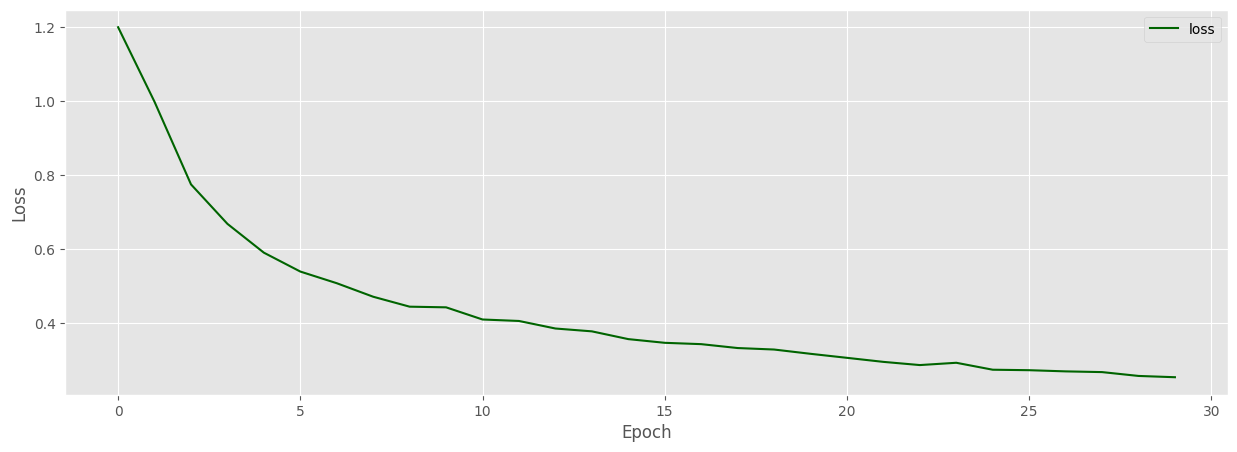

In [21]:
import matplotlib.pyplot as plt
import matplotlib as mpl

print(plt.style.available)
mpl.style.use('ggplot')

plt.figure(figsize=(15, 5))
plt.plot(history.history['loss'], "darkgreen", label="loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


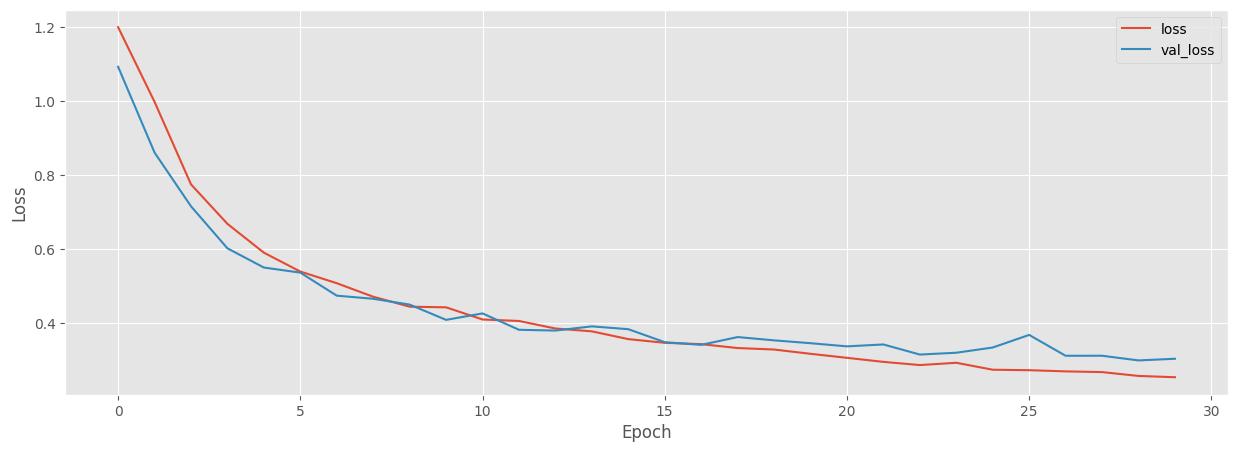

In [22]:
plt.figure(figsize=(15, 5))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

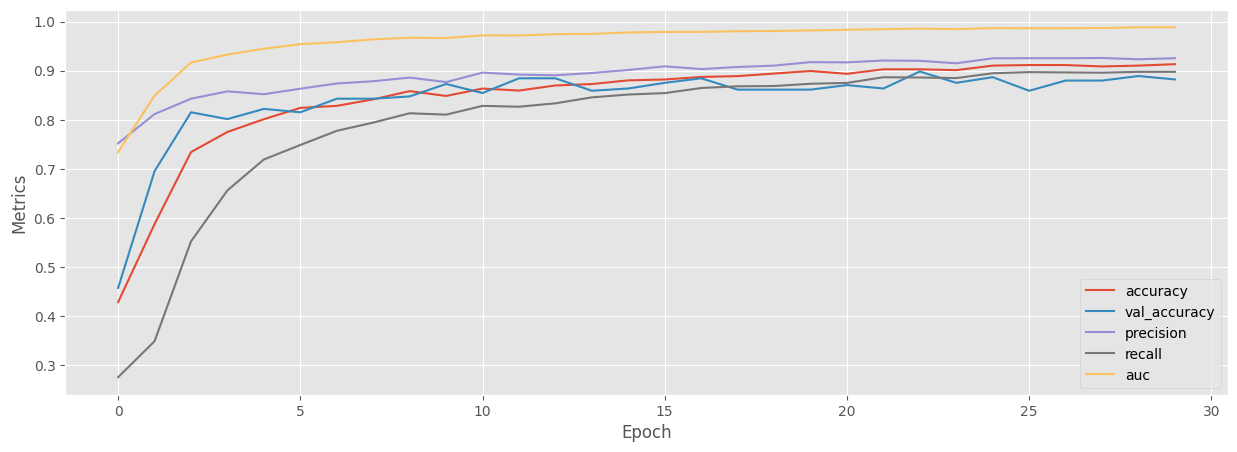

In [23]:
plt.figure(figsize=(15, 5))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['precision'], label='precision')
plt.plot(history.history['recall'], label='recall')
plt.plot(history.history['auc'], label='auc')
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


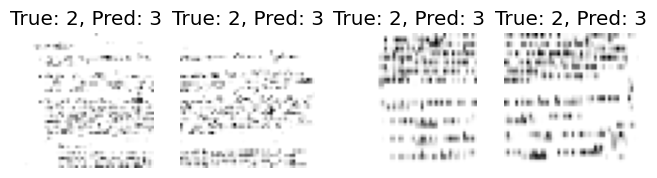

Image 0: True Label = 2, Predicted Label = 3


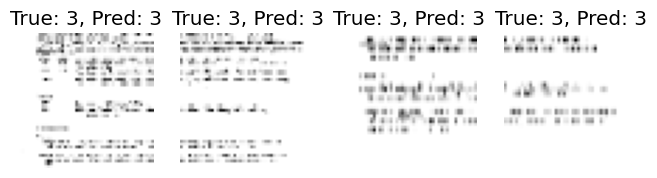

Image 1: True Label = 3, Predicted Label = 3


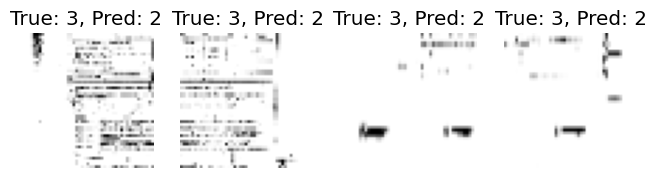

Image 2: True Label = 3, Predicted Label = 2


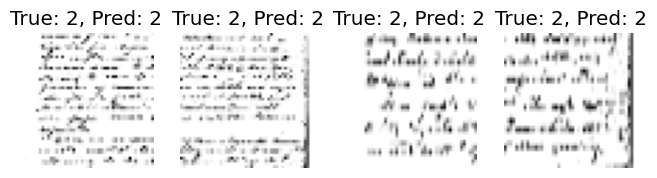

Image 3: True Label = 2, Predicted Label = 2


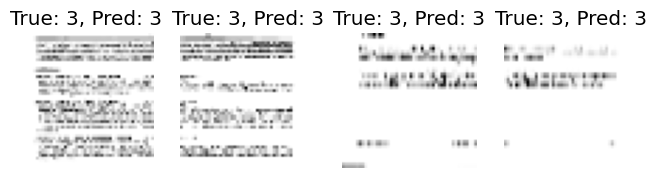

Image 4: True Label = 3, Predicted Label = 3


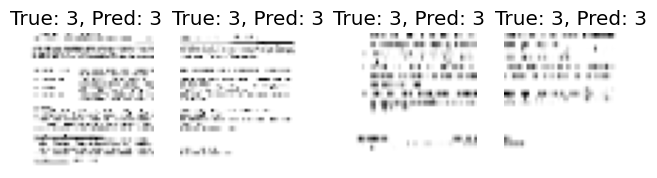

Image 5: True Label = 3, Predicted Label = 3


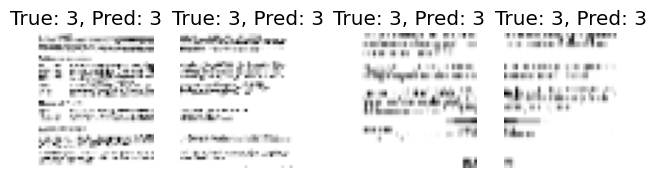

Image 6: True Label = 3, Predicted Label = 3


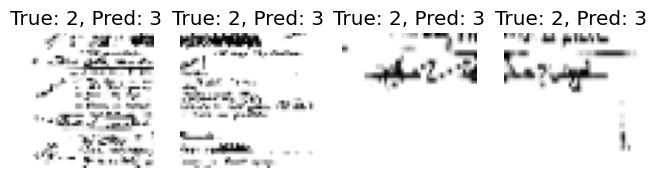

Image 7: True Label = 2, Predicted Label = 3


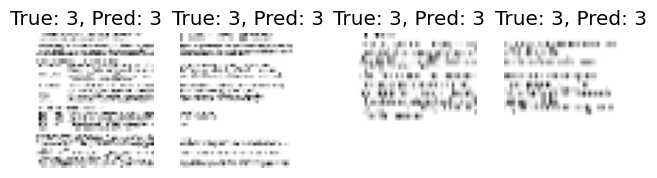

Image 8: True Label = 3, Predicted Label = 3


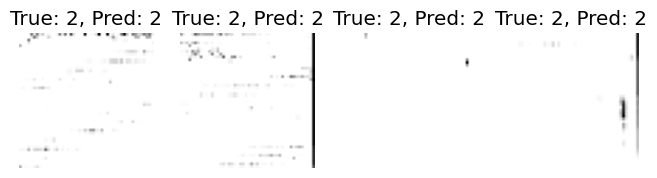

Image 9: True Label = 2, Predicted Label = 2


In [24]:
test_indices = np.arange(10)
test_images_subset = test_images[test_indices]
test_labels_subset = test_labels[test_indices]

predicted_probs_subset = model.predict(test_images_subset)
predicted_labels_subset = np.argmax(predicted_probs_subset, axis=1)
true_labels_subset = np.argmax(test_labels_subset, axis=1)

for i in range(len(test_indices)):
    fig, axes = plt.subplots(1, 4, figsize=(8, 2))
    for j in range(4):
        axes[j].imshow(test_images_subset[i][j].reshape(48, 48), cmap='gray')
        axes[j].set_title(f"True: {true_labels_subset[i]}, Pred: {predicted_labels_subset[i]}")
        axes[j].axis('off')
    plt.show()
    print(f"Image {i}: True Label = {true_labels_subset[i]}, Predicted Label = {predicted_labels_subset[i]}")


In [25]:
model.evaluate(test_images, test_labels, batch_size=16)

28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 198ms/step - accuracy: 0.8741 - auc: 0.9810 - loss: 0.3236 - precision: 0.8922 - recall: 0.8618


[0.3026832342147827,
 0.8822171092033386,
 0.8978622555732727,
 0.8729792237281799,
 0.9832621216773987]

In [26]:
y_pred = model.predict(test_images, batch_size=16, verbose= 1)
y_pred = np.argmax(y_pred, axis = 1)
y_test = np.argmax(test_labels, axis = 1)
y_test

28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 197ms/step


array([2, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 2, 0, 3, 3, 0, 0, 1, 3, 3, 3, 2,
       3, 3, 0, 3, 3, 0, 3, 1, 2, 3, 0, 0, 3, 2, 3, 1, 3, 3, 3, 3, 3, 1,
       2, 3, 3, 2, 0, 3, 3, 3, 3, 0, 0, 1, 2, 0, 0, 1, 2, 0, 2, 0, 0, 2,
       1, 2, 2, 3, 1, 1, 3, 2, 3, 0, 3, 0, 0, 3, 0, 3, 3, 0, 2, 1, 1, 3,
       3, 3, 0, 2, 2, 0, 3, 3, 0, 0, 1, 3, 2, 2, 3, 0, 0, 2, 1, 3, 3, 3,
       2, 1, 3, 3, 2, 3, 1, 2, 1, 3, 3, 1, 0, 3, 1, 3, 3, 3, 3, 0, 0, 3,
       3, 0, 2, 3, 3, 3, 1, 3, 0, 2, 3, 1, 1, 1, 0, 3, 2, 2, 3, 2, 3, 3,
       3, 1, 2, 3, 3, 3, 1, 3, 3, 3, 0, 0, 1, 2, 3, 3, 2, 3, 0, 3, 2, 3,
       3, 0, 3, 3, 1, 1, 2, 1, 1, 2, 3, 0, 2, 3, 1, 0, 3, 1, 2, 3, 1, 3,
       3, 3, 2, 3, 1, 3, 2, 0, 3, 1, 3, 3, 3, 3, 3, 0, 1, 3, 1, 1, 1, 2,
       3, 3, 3, 1, 0, 3, 0, 3, 2, 3, 3, 2, 0, 1, 1, 0, 0, 2, 2, 1, 2, 3,
       3, 2, 2, 1, 2, 0, 0, 3, 3, 3, 3, 1, 2, 3, 2, 2, 3, 0, 3, 0, 0, 1,
       0, 1, 1, 2, 3, 3, 2, 3, 1, 2, 3, 3, 2, 1, 0, 3, 1, 3, 0, 3, 3, 3,
       3, 3, 0, 2, 3, 3, 3, 0, 3, 0, 2, 1, 1, 2, 3,

In [27]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test, y_pred)

0.8822170900692841

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        76
           1       0.90      0.87      0.88        75
           2       0.86      0.80      0.83        95
           3       0.88      0.95      0.92       187

    accuracy                           0.88       433
   macro avg       0.88      0.86      0.87       433
weighted avg       0.88      0.88      0.88       433



In [29]:
classes = list(range(4))
res = tf.math.confusion_matrix(y_pred,y_test).numpy()
cm = pd.DataFrame(res,
                     index = classes, 
                     columns = classes)
cm

,0,1,2,3
0,63,1,6,1
1,1,65,1,5
2,8,1,76,3
3,4,8,12,178


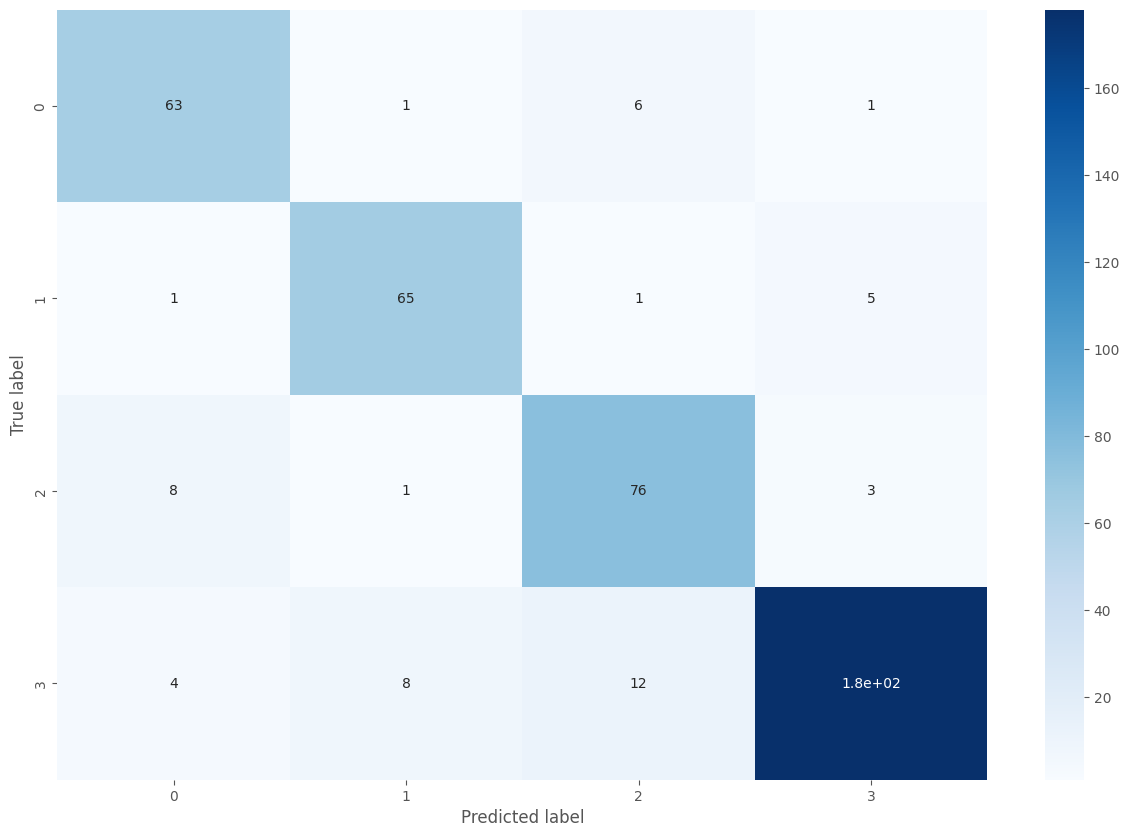

In [30]:
import seaborn as sns
figure = plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()